In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import os

In [146]:
# from random data
n=100
c=0.001
x1 = np.random.normal(size=n)
x2 = x1 + c*np.random.normal(size=n)
x3 = x1 - x2 + c*np.random.normal(size=n)
y = x1 + x2 + x3 + np.random.normal(size=n)
X = np.stack((x1, x2, x3), axis=1)
print("cor(x1, x2_ = ", pearsonr(x1, x2)[0])
print("cor(x3, x1-x2) = ", pearsonr(x3, x1 - x2)[0])
print("condition number of training X", np.linalg.cond(X))
# Pearson product-moment correlation coefficient or the bivariate correlation, 
# is a measure of the linear correlation between two variables X and Y

cor(x1, x2_ =  0.9999995756551905
cor(x3, x1-x2) =  0.6875294318947462
condition number of training X 3212.8246050123594


In [147]:
m = LinearRegression().fit(X, y)
print("lm coefficients: ", m.coef_)
# penalty value
alpha=.1 # sometimes refer to this as lambda
mr = Ridge(alpha = alpha).fit(X,y) # large alpha = large penalty
print("ridge coefficients:", mr.coef_)
ml = Lasso(alpha = alpha).fit(X,y)
print("ridge coefficients:", ml.coef_)

lm coefficients:  [-115.48801138  117.37286408  -65.99922809]
ridge coefficients: [ 0.85402091  1.01853215 -0.25299284]
ridge coefficients: [ 1.77647605e+00  3.04836565e-04 -0.00000000e+00]


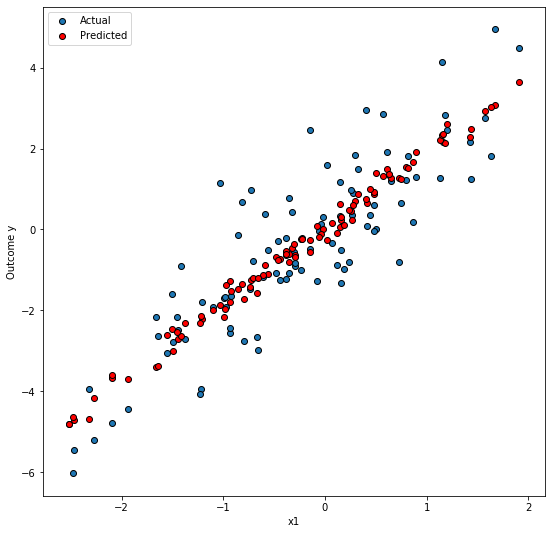

In [148]:
plt.figure(figsize=(9,9))
plt.scatter(x1, y, edgecolor='k', label='Actual')
hatY=m.predict(X)
plt.scatter(x1, hatY, c='r', edgecolor='k', label='Predicted')
plt.xlabel('x1')
plt.ylabel('Outcome y')
plt.legend()

In [149]:
nt = 1000
c = 0.001
x1t = np.random.normal(size=nt)
x2t = x1t + c*np.random.normal(size=nt)
x3t = x1t - x2t + c*np.random.normal(size=nt)
yt = x1t + x2t + x3t + np.random.normal(size=nt)
Xt = np.stack((x1t, x2t, x3t), axis=1)
print("condition number of validation X", np.linalg.cond(X))

condition number of validation X 3212.8246050123594


 $RMSE=\sqrt(mean(y_t-\hat y)^2)$

In [150]:
yhat = m.predict(Xt)
rmse = np.sqrt(np.mean(yt - yhat)**2)
print("lm:", rmse)
yhatr = mr.predict(Xt)
rmser = np.sqrt(np.mean(yt - yhatr)**2)
print("ridge:", rmser)
yhatl = ml.predict(Xt)
rmsel = np.sqrt(np.mean(yt - yhatl)**2)
print("lasso:", rmsel)

lm: 0.014573742699705156
ridge: 0.020762017290831054
lasso: 0.00481525024629995


## Exercise:

1. compute the rmse-s at different lambda values.  Use a wide range of lambdas, say b/w 1e-6 to 1e6.

2. make a plot where you show how rmse depends on $\lambda$.  Note: use log scale for lambda

3. make another plot where you show how coefficients depend on $\lambda$


In [151]:
alpha_list=np.linspace(10**(-6),10**(6), num=30000)
rmse=[]
rmser=[]
rmsel=[]
m_coef=[]
mr_coef=[]
ml_coef=[]
for alpha in alpha_list:
    mr = Ridge(alpha = alpha).fit(X,y)
    ml = Lasso(alpha = alpha).fit(X,y)
    yhat = m.predict(Xt)
    rmse.append(np.sqrt(np.mean(yt - yhat)**2))
    m_coef.append(m.coef_)
    yhatr = mr.predict(Xt)
    rmser.append(np.sqrt(np.mean(yt - yhatr)**2))
    mr_coef.append(mr.coef_)
    yhatl = ml.predict(Xt)
    rmsel.append(np.sqrt(np.mean(yt - yhatl)**2))
    ml_coef.append(ml.coef_)

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.57663300688594, tolerance: 0.0473122004455187
  positive)


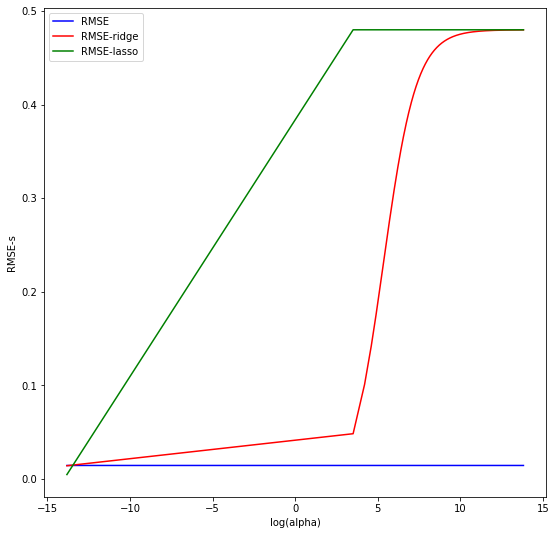

In [152]:
plt.figure(figsize=(9,9))
plt.plot(np.log(alpha_list), rmse, c='b', label='RMSE')
plt.plot(np.log(alpha_list), rmser, c='r', label='RMSE-ridge')
plt.plot(np.log(alpha_list), rmsel, c='g', label='RMSE-lasso')
plt.xlabel('log(alpha)')
plt.ylabel('RMSE-s')
plt.legend()

In [153]:
mr_coef_df=pd.DataFrame(mr_coef)
ml_coef_df=pd.DataFrame(ml_coef)

C:\Users\Zhu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


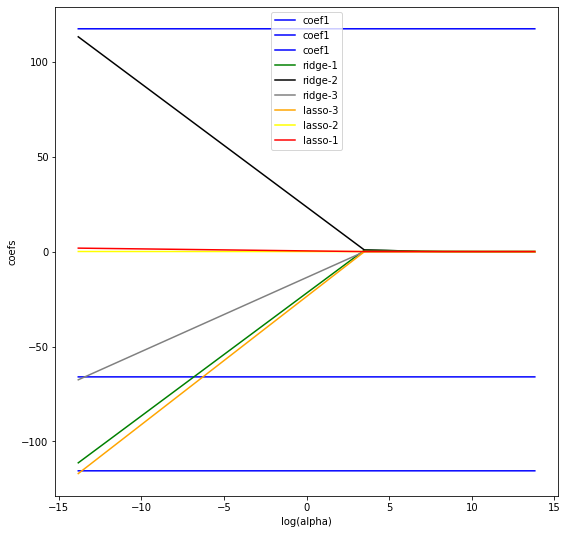

In [154]:
plt.figure(figsize=(9,9))
plt.plot(np.log(alpha_list), m_coef, c='b', label='coef1')
plt.plot(np.log(alpha_list),  mr_coef_df[0], c='g', label='ridge-1')
plt.plot(np.log(alpha_list),  mr_coef_df[1], c='black', label='ridge-2')
plt.plot(np.log(alpha_list),  mr_coef_df[2], c='grey', label='ridge-3')

plt.plot(np.log(alpha_list),  ml_coef_df[2], c='orange', label='lasso-3')
plt.plot(np.log(alpha_list),  ml_coef_df[1], c='yellow', label='lasso-2')
plt.plot(np.log(alpha_list),  ml_coef_df[0], c='r', label='lasso-1')
plt.xlabel('log(alpha)')
plt.ylabel('coefs')
plt.legend()

## Exercise

* Start with small alpha (0) and increase it to a large number (1e+9 or so).
* Run both Ridge and Lasso regressions.
* At each step record RMSE, the corresponding coefficients.
* make a plot that shows how RMSE depends on $\lambda$.
* make another plot of where the coefficient value depends on alpha (see James et al, Figure 6.4 and 6.6)

Hint: use `model.coef_` to extract coefficients from the fitted model.
You can compute RMSE in the same way as done in the example.

In [155]:
# Where are we?
print(os.getcwd())
boston = pd.read_csv("boston.csv.bz2", sep="\t")
print(boston.shape)
print(boston.sample(4))  # just a sanity check
X = boston.drop('medv', axis=1).values
y = boston.medv.values
print("Condition number of X", np.linalg.cond(X))

C:\Users\Zhu\Documents
(506, 14)
        crim    zn  indus  chas    nox     rm   age      dis  rad  tax  \
111  0.10084   0.0  10.01     0  0.547  6.715  81.6   2.6775    6  432   
28   0.77299   0.0   8.14     0  0.538  6.495  94.4   4.4547    4  307   
178  0.06642   0.0   4.05     0  0.510  6.860  74.4   2.9153    5  296   
355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334   

     ptratio   black  lstat  medv  
111     17.8  395.59  10.16  22.8  
28      21.0  387.94  12.80  18.4  
178     16.6  391.27   6.92  29.9  
355     22.0  376.04   5.57  20.6  
Condition number of X 8497.93630384575


RMSE on training = 4.753456302303618
RMSE on validation = 4.501005571963155


Text(0, 0.5, 'predicted MEDV')

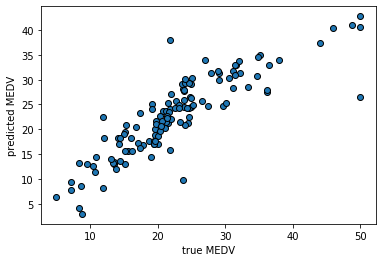

In [159]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)
m = LinearRegression().fit(Xtrain, ytrain)
## RMSE on training
yhat = m.predict(Xtrain)
rmse = np.sqrt(np.mean((ytrain - yhat)**2))
print("RMSE on training =", rmse)
## RMSE on validation
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE on validation =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

In [160]:
boston1 = pd.concat((
boston, boston.rm**2, boston.rm**3, boston.rm**4, boston.rm**5, boston.rm**6,
boston.crim**2, boston.crim**2, boston.zn**3, boston.zn**4,
boston.indus**2, boston.indus**3, boston.indus**4,
boston.crim*boston.indus, boston.crim*boston.zn, boston.crim*boston.chas,
boston.rm*boston.age, boston.rm*boston.age**2), axis=1)
boston1 = boston1.sample(100)
X = boston1.drop('medv', axis=1).values
y = boston1.medv.values
print("Condition number of X", np.linalg.cond(X))
print(boston1.head())
print("dim of extended Boston data", boston1.shape)

Condition number of X 1.9753361463916585e+23
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ...  \
268  0.54050  20.0   3.97     0  0.575  7.470  52.6  2.8720    5  264  ...   
36   0.09744   0.0   5.96     0  0.499  5.841  61.4  3.3779    5  279  ...   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273  ...   
266  0.78570  20.0   3.97     0  0.647  7.014  84.6  2.1329    5  264  ...   
241  0.10612  30.0   4.93     0  0.428  6.095  65.1  6.3361    6  300  ...   

          zn        zn     indus        indus         indus         0  \
268   8000.0  160000.0   15.7609    62.570773    248.405969  2.145785   
36       0.0       0.0   35.5216   211.708736   1261.784067  0.580742   
503      0.0       0.0  142.3249  1697.936057  20256.377160  0.724867   
266   8000.0  160000.0   15.7609    62.570773    248.405969  3.119229   
241  27000.0  810000.0   24.3049   119.823157    590.728164  0.523172   

           1    2         3            4  
268 

Pure linear regression coefficients:
 [-2.41089635e+07  4.81947651e+06  6.05769333e+06  2.23024119e+09
  1.39086264e+09  5.88340434e+11 -5.80696682e+06 -7.63005937e+07
  2.95491096e+07 -1.92382837e+06 -1.56832990e+07 -3.72766651e+05
 -7.23380291e+06 -4.49956766e+11  1.37032567e+11 -2.07649265e+10
  1.56558584e+09 -4.69904518e+07 -7.68246175e+10  7.68247961e+10
 -8.08773661e-06  8.30479125e-08 -9.03550327e-02  8.42642387e-03
 -1.78639069e-04 -1.81754980e-01 -1.97166786e-01  1.53689314e+01
 -6.58395216e-03 -1.74185739e-04]
sklearn estimated coefficients:
 [ 3.19598857e+00 -2.03275090e-02  1.22889663e-01 -1.35402948e+00
 -1.81197099e+01  6.73915962e+04  1.70381736e-01 -5.82717270e-01
  2.13615103e-01 -1.71818444e-02 -1.02431526e+00  7.90464928e-03
 -5.00657608e-01 -2.75892164e+04  6.00280919e+03 -7.32298732e+02
  4.75027936e+01 -1.28023196e+00  5.57463458e-04 -2.80163890e-05
 -1.27083085e-05  1.24383048e-07 -9.51806751e-02  8.71782214e-03
 -1.85076370e-04 -1.83736031e-01 -2.17624274e-01  

Text(0, 0.5, 'predicted MEDV')

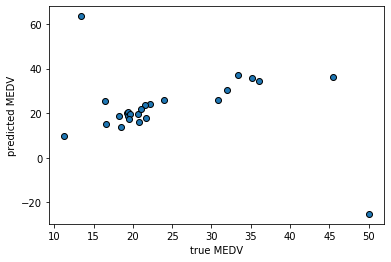

In [161]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y)
## try linear regression formula
beta = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ ytrain
print("Pure linear regression coefficients:\n", beta)
## 
m = LinearRegression().fit(Xtrain, ytrain)
print("sklearn estimated coefficients:\n", m.coef_)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

RMSE = 3.295341010924246


Text(0, 0.5, 'predicted MEDV')

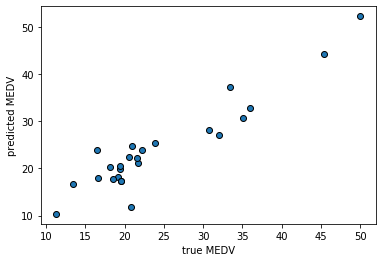

In [162]:
alpha=10000
m = Ridge(alpha=alpha).fit(Xtrain, ytrain)
yhat  = m.predict(Xvalid)
rmse = np.sqrt(np.mean((yvalid - yhat)**2))
print("RMSE =", rmse)
# not overfitting, pretty good result :-)
plt.scatter(yvalid, yhat, edgecolor='k')
plt.xlabel('true MEDV')
plt.ylabel('predicted MEDV')

In [163]:
alpha_list=np.linspace(0,10**(9), num=3000)
rmse=[]
rmser=[]
rmsel=[]
m_coef=[]
mr_coef=[]
ml_coef=[]
for alpha in alpha_list:
    mr = Ridge(alpha = alpha).fit(Xtrain,ytrain)
    ml = Lasso(alpha = alpha).fit(Xtrain,ytrain)
    yhatr = mr.predict(Xvalid)
    rmser.append(np.sqrt(np.mean(yvalid - yhatr)**2))
    mr_coef.append(mr.coef_)
    yhatl = ml.predict(Xvalid)
    rmsel.append(np.sqrt(np.mean(yvalid - yhatl)**2))
    ml_coef.append(ml.coef_)

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.59175e-27): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.47208519339435, tolerance: 0.47679312
  positive)


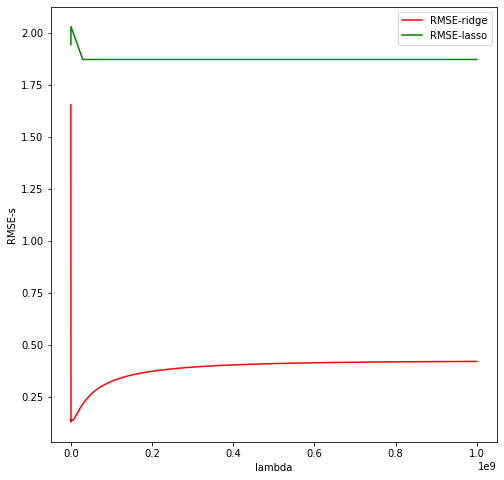

In [164]:
plt.figure(figsize=(8,8))
plt.plot(alpha_list, rmser, c='r', label='RMSE-ridge')
plt.plot(alpha_list, rmsel, c='g', label='RMSE-lasso')
plt.xlabel('lambda')
plt.ylabel('RMSE-s')
plt.legend()

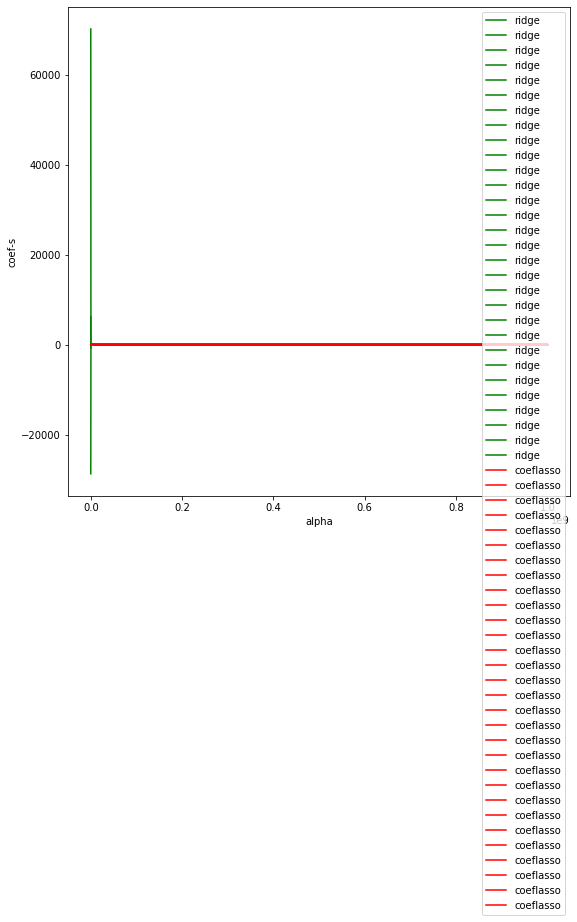

In [165]:
plt.figure(figsize=(9,9))

plt.plot(alpha_list,  mr_coef, c='g', label='ridge')
plt.plot(alpha_list,  ml_coef, c='r', label='coeflasso')
plt.xlabel('alpha')
plt.ylabel('coef-s')
plt.legend()

it's meaningless for the lambda to be so big.

In [166]:
alpha_list=np.linspace(0,20, num=3000)
rmse=[]
rmser=[]
rmsel=[]
m_coef=[]
mr_coef=[]
ml_coef=[]
for alpha in alpha_list:
    mr = Ridge(alpha = alpha).fit(Xtrain,ytrain)
    ml = Lasso(alpha = alpha).fit(Xtrain,ytrain)
    yhatr = mr.predict(Xvalid)
    rmser.append(np.sqrt(np.mean(yvalid - yhatr)**2))
    mr_coef.append(mr.coef_)
    yhatl = ml.predict(Xvalid)
    rmsel.append(np.sqrt(np.mean(yvalid - yhatl)**2))
    ml_coef.append(ml.coef_)

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.59175e-27): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.47208519339435, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.77117e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283.1449832589772, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.11192e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.3927333290333, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.9080266034267, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31716e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.92029507477366, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.34366e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.95456e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.51477099723536, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.98117e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.3453224917941, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.7013e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.8543284168402, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.72802e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.437640457356, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.50416e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.36994507263705, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.53096e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.9102760512026, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.38974e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383.9781419182306, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.41661e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.4187342408175, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.25031e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.4184670018663, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.2772e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.816817609509, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.21901e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410.92596040972694, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.24594e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.27641925633407, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.16213e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.38463079459734, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.1891e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.6878386558468, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.0793e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431.92702315295355, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.10629e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432.1840028625977, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.97026e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439.68933129908055, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.99727e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439.90164079759893, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.94293e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446.47221625399084, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.96996e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446.6376258558483, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.08892e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.5158386339775, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09162e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.6491620385558, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.25224857914867, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.37925621823604, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.50599401021486, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.6321687342646, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.09882313642544, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.21388773923627, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.32857031499844, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.4428703551796, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.4021286888884, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.5018581667311, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.6012041767131, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.7001667110246, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.9208056555007, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.00588944384856, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.09059428001393, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.17492389283643, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.8130603120692, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.88387320033416, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.95430937616953, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.02436276804985, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.4014050907451, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.4564478946587, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.5111067787312, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.5654174425764, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.9721671010691, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.01563242917996, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.0566053532141, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.09657034712416, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477.4633256486009, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477.5031513819678, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477.54287091224023, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477.58246363073096, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.011570573138, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.0470878556371, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.08249065943915, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.1177737807052, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.33931638928834, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.3699332614203, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.4004113834352, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.43075249515573, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.37718651104825, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.40233439182754, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.4273308434058, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.45216376728746, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.2258804849971, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.2437424124331, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.2613722842781, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.2787827117536, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.76654097696064, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.7734736263551, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.78009327700727, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.78638170345624, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.76513857490863, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.7565257499112, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.74739287684497, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.73774430497696, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.13743293676583, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.10652108751856, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.0747652492952, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.04211332418635, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.11350752389563, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.03274172244926, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.9500426109995, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.86537877902447, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.69858363407013, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.4775301215892, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.25008724798, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.0160080868849, toleran

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.98498372966, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.1007143468536, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.170746969248, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455.1915330103916, tolerance

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.37980816910238, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.568238385439827, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.61069145607371, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.653057654844133, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.861822514626, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.9711965932148, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130.07985550673015, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.15172194774135, toler

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.81833592699377, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.88444619144411, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.95060470791054, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.99729701785827, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.44476345739781, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.50652734725247, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.56868429369467, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.632192709412266, toler

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.185448769482946, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.345722044384615, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.51185922977254, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.515874159598525, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.268507067879796, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.20086128675257, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.136344995596573, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.071979781976324, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.987707109991334, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.922789587006037, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.864364517396893, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.806079288902652, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.699462671782157, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.642507498024202, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.590276801816799, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.527542224585318, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.709285145861713, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.657749155867805, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.61091149385743, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.545332959807865, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.975071184821559, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.922100838210895, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.88001887124858, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.81832635673868, toleranc

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.220408931045881, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.166346613776568, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.129065850038387, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.071434568222912, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.67680784294339, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6334826152500455, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.589228900530543, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.547024341980318, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.083762635715175, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.038899902531625, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.000380042698907, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.96223253864423, toleran

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6032834853683653, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5657498615418035, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5328238230383704, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4999200883005415, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5113407474194673, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4804810504036823, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4497025753113348, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4190076002863634, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.575119088327142, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5482093945910265, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5214685618620933, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49489990808160655, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.846434454901328, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.906498666755738, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.967340456294892, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.028974646200481, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.583312739876646, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.68592602131173, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.790163779633872, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.896059709673636, toleran

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.811970827482924, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.00643546265394, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.204475183974068, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.406165966236586, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.66774720193405, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.036507552689272, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.413021178467943, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.79741523834616, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.811149407803214, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.52388117067255, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.250456988612996, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.98936142681305, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.32540378610793, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.59938871214888, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.75644906771493, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.7748037760814, toleran

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.412724302809124, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.399986289648382, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.387268208869614, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.374570024197283, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.968093882891367, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.9561751245172445, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.944274772443464, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.932392793574309, toler

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.552026240980922, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.540885146498908, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.529761017634655, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.518653824110174, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.173301407435588, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.162808324691468, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.152357322536773, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.141933038723096, tolera

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8377302373253315, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.827869882241885, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.818024160952859, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.808193047886448, toler

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.511968672641501, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.502692510753718, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.493429930816092, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4841809093436495, toler

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1790716320425645, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.170360716217942, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.161662414107923, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1529769218198, toleran

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.883196374242061, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8750021322771318, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8668195597371096, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8586486369501927, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6042147884796805, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5964747977496927, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5887456910414812, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.581027450202896, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3482970881802885, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.340998214968863, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3337103351240103, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3264325562056456, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0997837414544165, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.092894633216929, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0860149453741315, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0791446625352137, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.878353419455493, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.87182681826107, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8653090246576767, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8588000243618126, toler

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.64353944200991, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6373750925097283, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6312189503177024, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.625071002304935, toler

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4278119685866386, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4219815031017333, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4161645839683388, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4103720300535088, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.213028171750125, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.20755080191293, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2020805081640447, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.19661727948494, toleran

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0207243264519548, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.015535657412215, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0103536015225245, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0051781486229174, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.83853371367627, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8336156498957052, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8287037702529005, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8237980654008652, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5507244391399126, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5462108629862996, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5417028458839468, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5372003796245508, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2925678859953678, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2884556178362345, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.284348283168356, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.280245874877437, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1635463303056213, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.159598583371121, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1556555293707333, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1517171616009136, tol

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0361136317392265, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.032340827481903, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0285724573529933, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.024808515157929, tole

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8189282964194717, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8154525927096756, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8119808897727125, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8085131821213736, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6413930162683528, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6381676340263311, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6349458902725473, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6317277801606451, to

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49711309173915197, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49407633479836477, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4910429535239018, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48801294352176683,

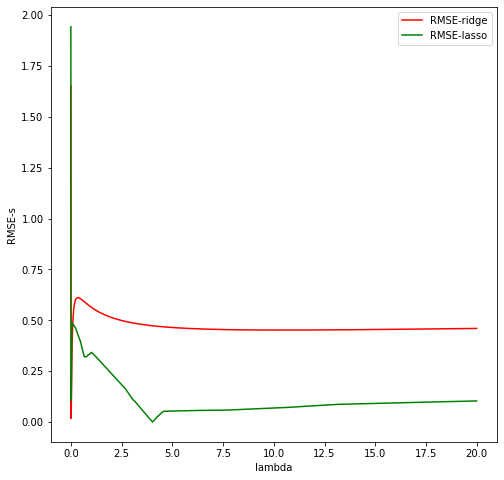

In [167]:
plt.figure(figsize=(8,8))
plt.plot(alpha_list, rmser, c='r', label='RMSE-ridge')
plt.plot(alpha_list, rmsel, c='g', label='RMSE-lasso')
plt.xlabel('lambda')
plt.ylabel('RMSE-s')
plt.legend()

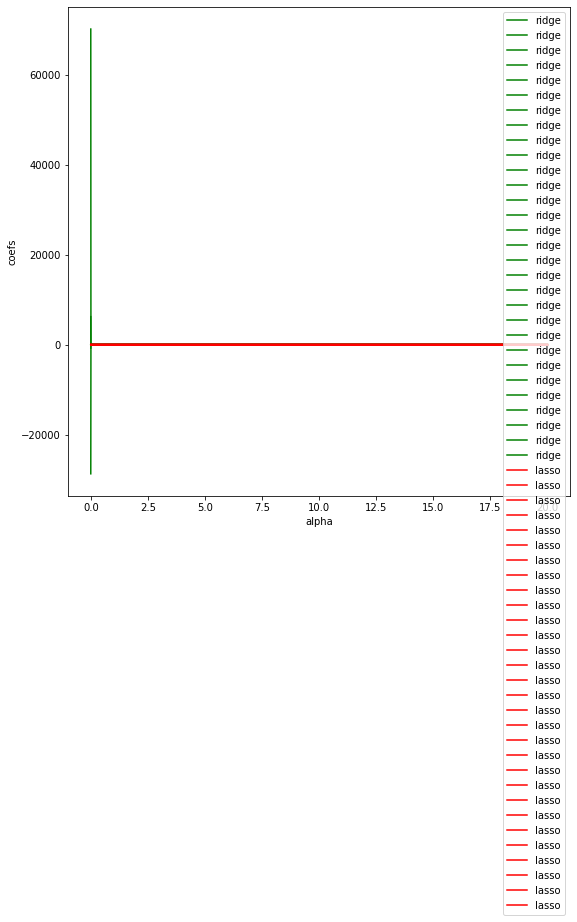

In [168]:
plt.figure(figsize=(9,9))

plt.plot(alpha_list,  mr_coef, c='g', label='ridge')
plt.plot(alpha_list,  ml_coef, c='r', label='lasso')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.legend()

In [169]:
alpha_list=np.linspace(0,1.5, num=3000)
rmse=[]
rmser=[]
rmsel=[]
m_coef=[]
mr_coef=[]
ml_coef=[]
for alpha in alpha_list:
    mr = Ridge(alpha = alpha).fit(Xtrain,ytrain)
    ml = Lasso(alpha = alpha).fit(Xtrain,ytrain)
    yhatr = mr.predict(Xvalid)
    rmser.append(np.sqrt(np.mean(yvalid - yhatr)**2))
    mr_coef.append(mr.coef_)
    yhatl = ml.predict(Xvalid)
    rmsel.append(np.sqrt(np.mean(yvalid - yhatl)**2))
    ml_coef.append(ml.coef_)

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.59175e-27): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.47208519339435, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.5838724934375, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.72123e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232.4097184644843, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.94683e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02557e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245.5029103298576, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.05061e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246.02926169931754, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60547e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.37830368918037, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6308e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.70239005518286, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.42002e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261.6540356284362, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.44558e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261.76535345457535, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.13753e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.73912411497895, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16321e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.8478999178435, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.15602e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.02687074228373, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.18149e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.13173711092674, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.84398e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.81653376890944, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.86948e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.91821212894257, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274.65132903784496, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.58359e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274.75279094523216, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.6091e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.2982e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.5644816783871, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.32373e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.6637594054401, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix 

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.98768e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.21443260236146, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.01323e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.31133012947737, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.62637e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.6099479217725, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.65192e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.7044708459502, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.29084e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.04135742425774, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.3164e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.13365617433726, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.67716e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.30831563638725, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.69696e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.39742738681167, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.17234e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.50870727858705, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.19215e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.59549506258276, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.6676e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.6530648950846, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.68742e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.7378257892202, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix 

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.20262e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294.90663322812804, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.22244e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294.9887546505578, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.71797e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297.0635572029276, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.7378e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297.14656127681576, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02137e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.13459675355523, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02335e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.21673390798765, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.08087e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.58761544128834, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.08285e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.66889617969196, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13048e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303.60271029075693, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13246e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303.68259096819577, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.17613e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305.43146978002477, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.17812e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305.51077556782883, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307.3914008325618, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22776e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307.4695466097233, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22974e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.01514284691507, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.26947e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.0917963702253, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.27146e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31716e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.92029507477247, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31915e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.9957466942829, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.36089e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.57177964796983, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.36288e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312.646160835355, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41259e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314.49280466436954, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41458e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314.5659285973742, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46232e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.30910810571925, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46431e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.38099507368673, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.51206e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.0940943040558, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.51405e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.1647510883097, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.6096648542242, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58572e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.6790000605904, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58771e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.64547e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.7238650535104, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.64746e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.79115306820165, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.19394627482177, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.69129e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.260477998785, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.69329e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.8338583137965, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.74112e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.89918080315226, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.74311e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.78498e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.31347788416946, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.78698e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.37705743984463, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.83284e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.8262644543882, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.83484e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.8887608792082, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.8887e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.5476943209864, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.8907e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.6084277117528, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.94657e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.2807523995278, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.94857e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332.33935554452285, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.97261930389493, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.00247e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.0354336692204, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.00447e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.05839e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.7191281053307, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.06038e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335.77761230038357, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337.10632183959433, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.10833e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337.16324346413273, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.11032e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Ob

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.16628e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.79092296864786, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.16827e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338.8460976052171, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340.2621583767908, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.22224e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340.3157308467772, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.22424e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.27623e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341.7411248112297, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.27823e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341.7929171567167, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343.1922137530019, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.33623e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343.2384754953514, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.33823e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.38024e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344.21900914139235, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.38225e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344.2699571389369, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.42827e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.43338444665983, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.43027e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.4833451346256, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.48632e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.86888580496594, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.48832e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.9176710356671, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348.22258042263564, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.54438e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348.27021844329863, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.54638e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Ob

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349.5440225115906, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.60046e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349.59050814885705, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.60246e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.65655e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.8541361878621, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.65855e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.89843160008127, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.71265e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.10784120104546, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.71466e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.15250869668927, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.75674e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.0771925042441, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.75875e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.1215711551954, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.79483e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.92000517196067, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.79684e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353.96409327117675, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.83493e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.80005703447125, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.83693e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.84376715448, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix 

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.88105e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.8027025422978, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.88306e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.84598421476824, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.91916e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.6240429517931, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.92116e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.6669912757985, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.96329e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357.56641096249905, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.96529e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357.6092728991828, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.00743e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.4999764846575, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.00943e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.5422900090123, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.50882676211006, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.05759e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.5508761224279, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.0596e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.1158e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.766595752278, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.11781e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.80908123118104, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix 

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16197e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.6396678221755, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16398e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.66774504269256, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.24028e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.8301338842113, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.24229e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.76964479863017, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.73828369452036, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.3146e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362.0127693519731, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.31661e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obje

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.36281e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365.02164801766673, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.36482e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365.0938511422661, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.44319e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367.11320186276447, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.4452e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367.1542065543382, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.49142e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.10948554068875, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.49343e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.1505164488803, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.54168e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.1247791127913, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.54369e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.16458417682736, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.57988e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.8781211266022, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.58189e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.9172185093468, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.63014e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.8449212281647, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.63216e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.8833812030131, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.68846e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.94302440486007, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.69048e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.9803373497115, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.83061872497206, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.73875e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.8672845669332, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.74076e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.79105e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.81546671097055, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.79307e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.85157153454486, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.84135e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.71264491525636, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.84337e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.7481405290888, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.89367e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.6307236301094, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.89569e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.6658107524397, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.94801e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376.53221869044893, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.95003e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376.56673658881505, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0084e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377.57676630501413, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.01041e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377.6115602798123, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.5792119159963, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.0688e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.6136059907807, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.07081e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objec

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.1131e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.3677008708462, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.11511e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.4015045623645, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix 

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.16948e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380.3084683380289, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.1715e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380.3424637835372, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix 

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.21581e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.0878233219083, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.21782e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.1216088826999, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.27221e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.03194912549844, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.27422e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.0656030838706, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.31854e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.8033239228737, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.32056e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.83671804515075, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.37295e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383.7018710688431, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.37496e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383.73503833384353, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.42332e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.5286026218165, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.42534e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.56156175342477, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.47572e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.3831301784237, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.47774e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.4158964534306, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53014e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.26536451089487, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.53216e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.2979439559787, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.58457e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.1419487334445, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.58659e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.1743200176779, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.64304e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388.07767980846234, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.64506e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388.10981030151925, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.70756e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389.1026207027874, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.70958e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389.1345601161248, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.7721e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.1199556096623, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.77411e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.15160388530154, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.84067e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.1925528992376, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.84269e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.22396165941564, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.90522e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.19349634116713, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.90724e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.22467074582676, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.9718e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393.2183630877165, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.97382e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393.24929413056026, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.03839e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.23507341882384, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.04041e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.2657769106496, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.10095e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395.18349775071226, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.10297e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395.2139766463111, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.16553e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.15473433116415, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.16755e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.18494765331116, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.23012e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.1187223728097, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.23214e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.1487453357605, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.29468e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.07500392102565, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.29669e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.10475807764885, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.36324e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.0829032748221, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.36526e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.11243004607365, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.43384e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.11169308312435, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.43586e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.140929825238, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.50041e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.07332706059884, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.50242e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.1023446819084, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.55286e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.825542330512, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.55488e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.85435564825787, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.62146e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402.80111960849854, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.62348e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402.8296858505823, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.68603e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403.71181490681295, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.68805e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403.7401493256276, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.67046003723, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.75667e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.69852436604054, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.75869e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objec

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.82126e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.59271357014893, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.82327e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.62054209594976, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matr

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.88989e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.5343229382436, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.89191e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406.56188025268494, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.95045e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.3578506815657, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.95247e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.38518115160815, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matri

C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.01304e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408.2014997955995, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.01506e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 408.2286162029902, tolerance: 0.47679312
  positive)
C:\Users\Zhu\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix

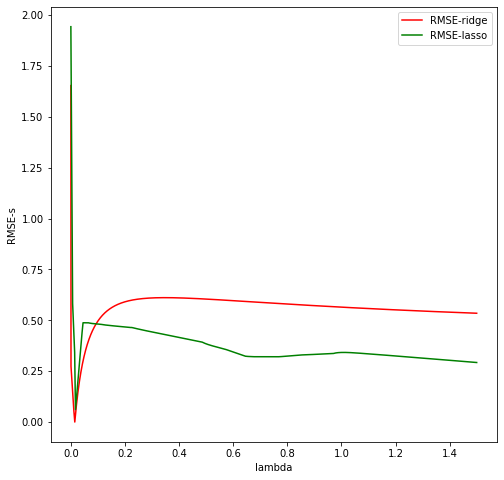

In [170]:
plt.figure(figsize=(8,8))
plt.plot(alpha_list, rmser, c='r', label='RMSE-ridge')
plt.plot(alpha_list, rmsel, c='g', label='RMSE-lasso')
plt.xlabel('lambda')
plt.ylabel('RMSE-s')
plt.legend()

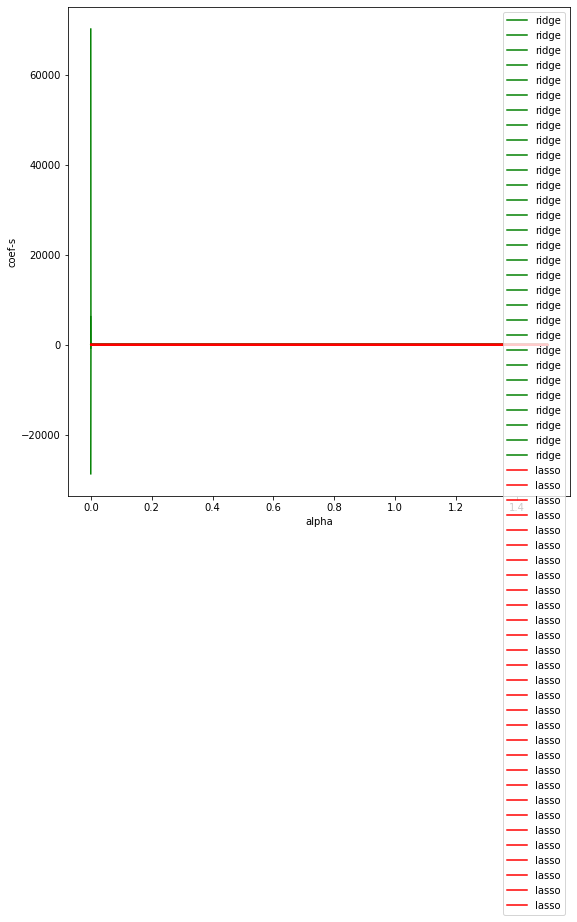

In [171]:
plt.figure(figsize=(9,9))

plt.plot(alpha_list,  mr_coef, c='g', label='ridge')
plt.plot(alpha_list,  ml_coef, c='r', label='lasso')
plt.xlabel('alpha')
plt.ylabel('coef-s')
plt.legend()